# Development notebook for processing sexual dimorphism data
## This notebook takes as input the csv produced from 'sample_reader_nb', which represents the load and rearranged sexual dimorphism data matrix

In [38]:
# Isaac Berez
# 17.01.23

from scipy.io import mmread
import os
import glob
import pandas as pd
import numpy as np
from pandas_ods_reader import read_ods
from copy import deepcopy
import pprint
import json
import re
from datetime import datetime
import logging
import matplotlib.pyplot as plt

import sample_reader as sr

### 1. Read in meta data and big data file

In [2]:
meta_data = pd.read_json('/bigdata/isaac/meta_data_dict.json')
meta_data.iloc[:5,:5]

,10X54_1,10X54_2,10x98_2,10x98_3,10X51_2
Serial_Number,106.0,107.0,212.0,213.0,98.0
Date_Captured,43993.0,43993.0,2021-03-22,2021-03-22,05/31/20
Species,Mm,Mm,Mm,Mm,Mm
Transcriptome,Mm10,Mm10,Mm10,Mm10,Mm10
Strain,Cntnp-C57Bl/6,Cntnp-C57Bl/6,Cntnp-C57Bl/6,Cntnp-C57Bl/6,C57Bl/6


In [3]:
#dimorph_df = pd.read_csv('/bigdata/isaac/dimorph_df.csv')
dimorph_df = pd.read_csv('/bigdata/isaac/dimorph_df.csv')
dimorph_df.head()

,AAACCCACAACAGTGG-1_10X54_1,AAACCCACATGGCCCA-1_10X54_1,AAACCCAGTCCCTGAG-1_10X54_1,AAACGAACACTACAGT-1_10X54_1,AAACGAATCCCAGCGA-1_10X54_1,AAACGAATCTGCTTAT-1_10X54_1,AAACGCTAGCAGATAT-1_10X54_1,AAACGCTAGTGCTCAT-1_10X54_1,AAACGCTGTCCGTACG-1_10X54_1,AAACGCTGTGGCTACC-1_10X54_1,...,TTTGGTTTCCACGAAT-1_10X37_2,TTTGGTTTCTTTCTAG-1_10X37_2,TTTGTTGAGAAATTCG-1_10X37_2,TTTGTTGAGTGCTCGC-1_10X37_2,TTTGTTGCAAGGTCAG-1_10X37_2,TTTGTTGCACCGCTGA-1_10X37_2,TTTGTTGGTCCATAGT-1_10X37_2,TTTGTTGGTTGCGAAG-1_10X37_2,TTTGTTGTCGAAGGAC-1_10X37_2,TTTGTTGTCTCTGCTG-1_10X37_2
0610007P14Rik,0,1,5,0,0,0,1,0,2,1,...,1,0,1,0,2,1,1,0,0,0
0610009B22Rik,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
0610009L18Rik,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
0610009O20Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0610010F05Rik,0,0,0,0,0,0,0,0,0,0,...,1,0,2,0,1,0,1,0,0,0


In [22]:
# create meta data df with each row corresponding to meta data features, 
# and columns for each each cell,
meta_data_df = pd.DataFrame(index = meta_data.index, columns = dimorph_df.columns)
for i,v in enumerate(meta_data.keys()):
    #print (v)
    if len(meta_data_df.columns[meta_data_df.columns.str.contains(meta_data.keys()[i])])>0:
        meta_data_df.loc[meta_data_df.index[:],
                        meta_data_df.columns[meta_data_df.columns.str.contains(meta_data.keys()[i])]] =meta_data.loc[meta_data.index[:], meta_data.columns[i]]
meta_data_df

,AAACCCACAACAGTGG-1_10X54_1,AAACCCACATGGCCCA-1_10X54_1,AAACCCAGTCCCTGAG-1_10X54_1,AAACGAACACTACAGT-1_10X54_1,AAACGAATCCCAGCGA-1_10X54_1,AAACGAATCTGCTTAT-1_10X54_1,AAACGCTAGCAGATAT-1_10X54_1,AAACGCTAGTGCTCAT-1_10X54_1,AAACGCTGTCCGTACG-1_10X54_1,AAACGCTGTGGCTACC-1_10X54_1,...,TTTGGTTTCCACGAAT-1_10X37_2,TTTGGTTTCTTTCTAG-1_10X37_2,TTTGTTGAGAAATTCG-1_10X37_2,TTTGTTGAGTGCTCGC-1_10X37_2,TTTGTTGCAAGGTCAG-1_10X37_2,TTTGTTGCACCGCTGA-1_10X37_2,TTTGTTGGTCCATAGT-1_10X37_2,TTTGTTGGTTGCGAAG-1_10X37_2,TTTGTTGTCGAAGGAC-1_10X37_2,TTTGTTGTCTCTGCTG-1_10X37_2
Serial_Number,106.0,106.0,106.0,106.0,106.0,106.0,106.0,106.0,106.0,106.0,...,68.0,68.0,68.0,68.0,68.0,68.0,68.0,68.0,68.0,68.0
Date_Captured,43993.0,43993.0,43993.0,43993.0,43993.0,43993.0,43993.0,43993.0,43993.0,43993.0,...,2019-11-25,2019-11-25,2019-11-25,2019-11-25,2019-11-25,2019-11-25,2019-11-25,2019-11-25,2019-11-25,2019-11-25
Species,Mm,Mm,Mm,Mm,Mm,Mm,Mm,Mm,Mm,Mm,...,Mm,Mm,Mm,Mm,Mm,Mm,Mm,Mm,Mm,Mm
Transcriptome,Mm10,Mm10,Mm10,Mm10,Mm10,Mm10,Mm10,Mm10,Mm10,Mm10,...,Mm10,Mm10,Mm10,Mm10,Mm10,Mm10,Mm10,Mm10,Mm10,Mm10
Strain,Cntnp-C57Bl/6,Cntnp-C57Bl/6,Cntnp-C57Bl/6,Cntnp-C57Bl/6,Cntnp-C57Bl/6,Cntnp-C57Bl/6,Cntnp-C57Bl/6,Cntnp-C57Bl/6,Cntnp-C57Bl/6,Cntnp-C57Bl/6,...,None,None,None,None,None,None,None,None,None,None
Project,Cntnp_KO,Cntnp_KO,Cntnp_KO,Cntnp_KO,Cntnp_KO,Cntnp_KO,Cntnp_KO,Cntnp_KO,Cntnp_KO,Cntnp_KO,...,Dimorph,Dimorph,Dimorph,Dimorph,Dimorph,Dimorph,Dimorph,Dimorph,Dimorph,Dimorph
Group,Cntnp-KO-F,Cntnp-KO-F,Cntnp-KO-F,Cntnp-KO-F,Cntnp-KO-F,Cntnp-KO-F,Cntnp-KO-F,Cntnp-KO-F,Cntnp-KO-F,Cntnp-KO-F,...,Naïve-M,Naïve-M,Naïve-M,Naïve-M,Naïve-M,Naïve-M,Naïve-M,Naïve-M,Naïve-M,Naïve-M
ChipID,10X54,10X54,10X54,10X54,10X54,10X54,10X54,10X54,10X54,10X54,...,10X37,10X37,10X37,10X37,10X37,10X37,10X37,10X37,10X37,10X37
SampleID,10X54_1,10X54_1,10X54_1,10X54_1,10X54_1,10X54_1,10X54_1,10X54_1,10X54_1,10X54_1,...,10X37_2,10X37_2,10X37_2,10X37_2,10X37_2,10X37_2,10X37_2,10X37_2,10X37_2,10X37_2
DonorID,Cntnp-KO_2-9F,Cntnp-KO_2-9F,Cntnp-KO_2-9F,Cntnp-KO_2-9F,Cntnp-KO_2-9F,Cntnp-KO_2-9F,Cntnp-KO_2-9F,Cntnp-KO_2-9F,Cntnp-KO_2-9F,Cntnp-KO_2-9F,...,"DI4,DI5","DI4,DI5","DI4,DI5","DI4,DI5","DI4,DI5","DI4,DI5","DI4,DI5","DI4,DI5","DI4,DI5","DI4,DI5"


### 2. Calculate molecules/cell and genes/cell vectors, keep only cells with >2500 mol/cell and >2000 genes/cell

In [5]:
dimorph_df.columns[0]

'AAACCCACAACAGTGG-1_10X54_1'

In [6]:
total_molecules_per_cell = dimorph_df.sum(axis=0)
total_molecules_per_cell = np.reshape(np.array(total_molecules_per_cell),(1,len(total_molecules_per_cell)))
print('total molecules per cell shape: ', total_molecules_per_cell.shape)
print('total molecules per cell: ', total_molecules_per_cell)

total molecules per cell shape:  (1, 101317)
total molecules per cell:  [[ 1767  9504 15760 ...  5319  2685  1457]]


In [7]:
dimorph_df_bool = dimorph_df.mask(dimorph_df>0, other = 1)
#dimorph_df_bool

In [8]:
total_genes_per_cell = dimorph_df_bool.sum(axis=0)
total_genes_per_cell = np.reshape(np.array(total_genes_per_cell),(1,len(total_genes_per_cell)))
print('total genes per cell shape: ', total_genes_per_cell.shape)
print('total genes per cell: ', total_genes_per_cell)

total genes per cell shape:  (1, 101317)
total genes per cell:  [[ 889 3510 4568 ... 2636 1217  701]]


In [9]:
#total mols/cell AND total genes/cell boolean mask filter
threshold_m = 2500
threshold_g = 2000
mol_cell_mask = (total_molecules_per_cell>threshold_m)[0]
genes_cell_mask = (total_genes_per_cell>threshold_g)[0]
mol_AND_gene_cell_mask = np.logical_and(mol_cell_mask,genes_cell_mask)
print(mol_AND_gene_cell_mask)
dimorph_df_l2 = dimorph_df.loc[:,mol_AND_gene_cell_mask]
dimorph_df_l2.head()

[False  True  True ...  True False False]


,AAACCCACATGGCCCA-1_10X54_1,AAACCCAGTCCCTGAG-1_10X54_1,AAACGAACACTACAGT-1_10X54_1,AAACGAATCCCAGCGA-1_10X54_1,AAACGAATCTGCTTAT-1_10X54_1,AAACGCTAGTGCTCAT-1_10X54_1,AAACGCTGTCCGTACG-1_10X54_1,AAAGAACAGAGTTCGG-1_10X54_1,AAAGAACAGGTAGCCA-1_10X54_1,AAAGAACGTACGTACT-1_10X54_1,...,TTTGGAGGTGTGTCCG-1_10X37_2,TTTGGAGTCTCGCTTG-1_10X37_2,TTTGGTTTCCAATCTT-1_10X37_2,TTTGGTTTCCACGAAT-1_10X37_2,TTTGGTTTCTTTCTAG-1_10X37_2,TTTGTTGAGAAATTCG-1_10X37_2,TTTGTTGCAAGGTCAG-1_10X37_2,TTTGTTGCACCGCTGA-1_10X37_2,TTTGTTGGTCCATAGT-1_10X37_2,TTTGTTGGTTGCGAAG-1_10X37_2
0610007P14Rik,1,5,0,0,0,0,2,1,1,1,...,0,1,1,1,0,1,2,1,1,0
0610009B22Rik,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,2,0,0,0
0610009L18Rik,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
0610009O20Rik,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
0610010F05Rik,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,2,1,0,1,0


### 3. Gene Exclusion - exclude sex genes
#### Keep only genes expressed in >10 cells, <50% of all cells

In [12]:
#update gene boolean mask with l2 filtered cells
dimorph_df_bool_l2 = dimorph_df_bool.loc[:,dimorph_df_l2.columns]
dimorph_df_bool_l2.head()

,AAACCCACATGGCCCA-1_10X54_1,AAACCCAGTCCCTGAG-1_10X54_1,AAACGAACACTACAGT-1_10X54_1,AAACGAATCCCAGCGA-1_10X54_1,AAACGAATCTGCTTAT-1_10X54_1,AAACGCTAGTGCTCAT-1_10X54_1,AAACGCTGTCCGTACG-1_10X54_1,AAAGAACAGAGTTCGG-1_10X54_1,AAAGAACAGGTAGCCA-1_10X54_1,AAAGAACGTACGTACT-1_10X54_1,...,TTTGGAGGTGTGTCCG-1_10X37_2,TTTGGAGTCTCGCTTG-1_10X37_2,TTTGGTTTCCAATCTT-1_10X37_2,TTTGGTTTCCACGAAT-1_10X37_2,TTTGGTTTCTTTCTAG-1_10X37_2,TTTGTTGAGAAATTCG-1_10X37_2,TTTGTTGCAAGGTCAG-1_10X37_2,TTTGTTGCACCGCTGA-1_10X37_2,TTTGTTGGTCCATAGT-1_10X37_2,TTTGTTGGTTGCGAAG-1_10X37_2
0610007P14Rik,1,1,0,0,0,0,1,1,1,1,...,0,1,1,1,0,1,1,1,1,0
0610009B22Rik,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
0610009L18Rik,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
0610009O20Rik,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
0610010F05Rik,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,1,1,0,1,0


In [21]:
print (dimorph_df_bool_l2.shape)
print (dimorph_df_l2.shape)

(27933, 56840)
(27933, 56840)


In [13]:
#sum each row of l2 filtered boolean gene mask, get vector of dim (len(row genes)x1)
gene_sum_l2 = np.array(dimorph_df_bool_l2.sum(axis=1))
gene_sum_l2 = np.reshape(gene_sum_l2,(gene_sum_l2.shape[0],1))
gene_sum_l2.shape

(27933, 1)

In [14]:
#gene_sum_l2

In [17]:
dimorph_df_l3 = pd.DataFrame(columns = dimorph_df_l2.columns)
gene_exclusion_lwr_bound = 10
gene_exclusion_upper_bound = 0.5*dimorph_df_l2.shape[1]
genes_to_keep_indices = []
for i,v in enumerate(gene_sum_l2):
    if gene_exclusion_lwr_bound < v < gene_exclusion_upper_bound:
        genes_to_keep_indices.append(i)

#print (genes_to_keep_indices)
#dimorph_df_l3

In [18]:
#use genes to keep indices to extract genes from l2
dimorph_df_l3 = dimorph_df_l2.iloc[genes_to_keep_indices,:]
dimorph_df_l3

,AAACCCACATGGCCCA-1_10X54_1,AAACCCAGTCCCTGAG-1_10X54_1,AAACGAACACTACAGT-1_10X54_1,AAACGAATCCCAGCGA-1_10X54_1,AAACGAATCTGCTTAT-1_10X54_1,AAACGCTAGTGCTCAT-1_10X54_1,AAACGCTGTCCGTACG-1_10X54_1,AAAGAACAGAGTTCGG-1_10X54_1,AAAGAACAGGTAGCCA-1_10X54_1,AAAGAACGTACGTACT-1_10X54_1,...,TTTGGAGGTGTGTCCG-1_10X37_2,TTTGGAGTCTCGCTTG-1_10X37_2,TTTGGTTTCCAATCTT-1_10X37_2,TTTGGTTTCCACGAAT-1_10X37_2,TTTGGTTTCTTTCTAG-1_10X37_2,TTTGTTGAGAAATTCG-1_10X37_2,TTTGTTGCAAGGTCAG-1_10X37_2,TTTGTTGCACCGCTGA-1_10X37_2,TTTGTTGGTCCATAGT-1_10X37_2,TTTGTTGGTTGCGAAG-1_10X37_2
0610007P14Rik,1,5,0,0,0,0,2,1,1,1,...,0,1,1,1,0,1,2,1,1,0
0610009B22Rik,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,2,0,0,0
0610009L18Rik,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
0610009O20Rik,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
0610010F05Rik,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,2,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zzef1,0,1,0,0,0,1,0,1,1,1,...,1,0,1,2,0,1,1,1,0,1
Zzz3,0,0,0,1,0,0,1,0,0,0,...,1,0,1,1,0,1,1,0,0,0
a,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
l7Rn6,0,2,0,0,1,0,1,0,1,1,...,1,2,1,0,0,1,2,1,1,0


In [59]:
#compute meta data and get mean of bool expressed genes for each sex
meta_data_df_l2 = meta_data_df.loc[:,dimorph_df_l2.columns]
bool_expr_m_l2 = dimorph_df_bool_l2.loc[:,meta_data_df_l2.loc['Sex',:] == 'M'].mean(axis=1)
bool_expr_f_l2 = dimorph_df_bool_l2.loc[:,meta_data_df_l2.loc['Sex',:] == 'F'].mean(axis=1)



In [62]:
bool_expr_m_l2

0610007P14Rik    0.479569
0610009B22Rik    0.314092
0610009L18Rik    0.158793
0610009O20Rik    0.147704
0610010F05Rik    0.299965
                   ...   
mt-Nd3           0.997367
mt-Nd4           0.999949
mt-Nd4l          0.981164
mt-Nd5           0.995139
mt-Nd6           0.482759
Length: 27933, dtype: float64

In [89]:
x_m = np.reshape(np.array(bool_expr_m_l2),(len(bool_expr_m_l2),1))
x_f = np.reshape(np.array(bool_expr_f_l2),(len(bool_expr_f_l2),1))

In [93]:
x_f

array([[0.52243694],
       [0.30215291],
       [0.15167629],
       ...,
       [0.95551521],
       [0.98865184],
       [0.39595357]])

In [95]:
mf_df_l2 = pd.DataFrame({'m': bool_expr_m_l2, 'f': bool_expr_f_l2})
mf_df_l2

,m,f
0610007P14Rik,0.479569,0.522437
0610009B22Rik,0.314092,0.302153
0610009L18Rik,0.158793,0.151676
0610009O20Rik,0.147704,0.158874
0610010F05Rik,0.299965,0.303612
...,...,...
mt-Nd3,0.997367,0.993775
mt-Nd4,0.999949,1.000000
mt-Nd4l,0.981164,0.955515
mt-Nd5,0.995139,0.988652


In [98]:
delta_bool_expr_m_f_l2 = bool_expr_m_l2 - bool_expr_f_l2
#mf_df_l2.insert(2,'delta m-f', delta_bool_expr_m_f_l2)
mf_df_l2

,m,f,delta m-f
0610007P14Rik,0.479569,0.522437,-0.042868
0610009B22Rik,0.314092,0.302153,0.011939
0610009L18Rik,0.158793,0.151676,0.007117
0610009O20Rik,0.147704,0.158874,-0.011171
0610010F05Rik,0.299965,0.303612,-0.003647
...,...,...,...
mt-Nd3,0.997367,0.993775,0.003592
mt-Nd4,0.999949,1.000000,-0.000051
mt-Nd4l,0.981164,0.955515,0.025648
mt-Nd5,0.995139,0.988652,0.006487


In [73]:
delta_bool_expr_m_f_l2_sorted = delta_bool_expr_m_f_l2.sort_values()
delta_bool_expr_m_f_l2_sorted

Xist      -0.977300
Tsix      -0.337405
Snca      -0.164887
Erdr1     -0.138970
Lars2     -0.105330
             ...   
Ccdc85b    0.164849
Kdm5d      0.170870
Gm10076    0.193646
Eif2s3y    0.375964
Ddx3y      0.528037
Length: 27933, dtype: float64

In [77]:
top_10_female_genes = delta_bool_expr_m_f_l2_sorted[:10]
top_10_male_genes = delta_bool_expr_m_f_l2_sorted[-10:]


0.5280374924089883

In [78]:
print (top_10_male_genes.index[9])
print (top_10_male_genes[9])

Ddx3y
0.5280374924089883


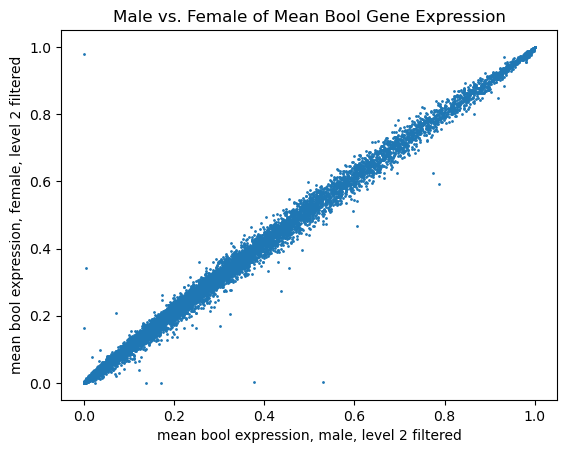

In [74]:
fig,ax = plt.subplots()
#plt.figure('bool expressed m/f l2')
plt.scatter(bool_expr_m_l2,bool_expr_f_l2, s = 1)
plt.xlabel('mean bool expression, male, level 2 filtered')
plt.ylabel('mean bool expression, female, level 2 filtered')
plt.title('Male vs. Female of Mean Bool Gene Expression')
ax.annotate(top_10_male_genes.index[9],)

plt.show()